The purpose of this notebook is to read in and use the data to make figure one. This shows us how many PSMs under a certain cutoff that each tool is finding.

In [1]:
import os
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
sys.path
import data_loader as dl

Graphing how many peptides each tool finds at a specific cutoff

In [2]:
#read in the megaScript and reformat it
def clean_meagScript(file):
    df = pd.read_csv(file, low_memory=False,  header=[0,1])
    df.drop(columns = {"Unnamed: 0_level_0"})
    return df

Slicing out the Peptide Prophet Probability values for MsFragger. There is no qvalue or PEP, so this is the row we are using. 
Counting how many are at or under the cutoff

In [3]:
def get_msf_prob_len(df, cutoff):
    msf_probability = df["MsFragger"]['Updated_probability']
    msf_probability =  msf_probability.dropna()
    msf_under_cutoff = len(msf_probability.loc[msf_probability <= cutoff])
    return msf_under_cutoff

Slicing out the qvalues from MetaMorpheus Counting how many are at or under the cutoff

In [4]:
def get_mm_Qval_len(df, cutoff):
    mm_qval = df["MetaMorpheus"]["QValue"] 
    mm_qval =  mm_qval.dropna() 
    mm_under_cutoff = len(mm_qval.loc[mm_qval <= cutoff])
    return mm_under_cutoff

Slicing out the PEP values from MetaMorpheus and counting how many are at or under the cutoff

In [5]:
def get_mm_PEP_len(df, cutoff):
    mm_PEP = df["MetaMorpheus"]["PEP"] 
    mm_PEP =  mm_PEP.dropna() 
    value_under_cutoff = len(mm_PEP.loc[mm_PEP <= cutoff])
    return value_under_cutoff

Slicing out the qvalues from MsgfPlus and counting how many are at or under the cutoff

In [6]:
def get_msg_Qval_len(df, cutoff):
    msg_qval = df["MsgfPlus"]["QValue"] 
    msg_qval =  msg_qval.dropna() 
    msg_under_cutoff = len(msg_qval.loc[msg_qval <= cutoff])
    return msg_under_cutoff

Slicing out the PEP from MaxQuant. Counting how many are at or under the cutoff

In [7]:
def get_mq_PEP_len(df, cutoff):
    mq_PEP = df["MaxQuant"]["PEP"] 
    mq_PEP =  mq_PEP.dropna() 
    mq_under_cutoff = len(mq_PEP.loc[mq_PEP <= cutoff])
    return mq_under_cutoff

This function gets the number of scan values that were at or below the cutoff for each tool and returns them. 

In [8]:
def get_file_values(file, cutoff):
    df = clean_meagScript(file)
    msf = get_msf_prob_len(df, cutoff)
    MM_QVal = get_mm_Qval_len(df, cutoff)
    MM_PEP = get_mm_PEP_len(df, cutoff)
    msg_QVal = get_msg_Qval_len(df, cutoff)
    MQ_PEP = get_mq_PEP_len(df, cutoff)
    values_list = {"msf" : msf, "MM_QVal" : MM_QVal, "MM_PEP" : MM_PEP, "msg_QVal" : msg_QVal, "MQ_PEP" : MQ_PEP}
    return values_list

Reading in the data and making the graph for the 2ng data at a certain cutoff

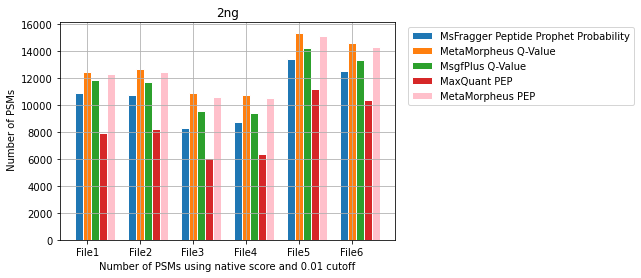

In [13]:
File1 = get_file_values("MokaPot/MegaScript_2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_prob = [File1['msf'], File2['msf'], File3['msf'], File4['msf'], File5['msf'], File6['msf']]
MM_PEP = [File1['MM_PEP'], File2['MM_PEP'], File3['MM_PEP'], File4['MM_PEP'], File5['MM_PEP'], File6['MM_PEP']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_PEP = [File1['MQ_PEP'], File2['MQ_PEP'], File3['MQ_PEP'], File4['MQ_PEP'], File5['MQ_PEP'], File6['MQ_PEP']]
 
# Set position of bar on X axis
r1 = np.arange(len(msf_prob))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_prob, width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_qval, width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r3, msg_qval, width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
plt.bar(r4, mq_PEP, width=barWidth, edgecolor='white', label='MaxQuant PEP')
plt.bar(r5, MM_PEP, width=barWidth, color = "#FFC0CB", edgecolor='white', label='MetaMorpheus PEP')
 
# Add xticks on the middle of the group bars
plt.ylabel(' Number of PSMs')
plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))
plt.grid()
figure1_1 = plt.gcf()
#figure1_1.savefig('2ng_PSM_native_score.png', dpi=300, bbox_inches='tight')
plt.show()


This graph shows the number of PSMs with a native score at or below a specific cutoff. Each tools has their own "probability" column that was used. For MetaMorpheus and MsgfPlus we used the q value column. MetaMorpheus also has a PEP column that was included in the graph. For MsFragger, the Peptide Prophet Prophet Probability column was used. The column used for MaxQuant was the PEP.
This showcases the data for the 0.2ng files.

Reading in the data and making the graph for the 0.2ng data at certain cutoff

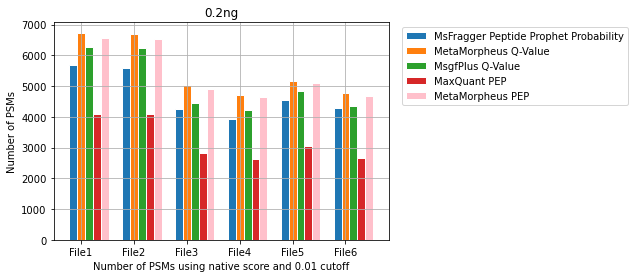

In [12]:
File1 = get_file_values("MokaPot/MegaScript_0.2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_0.2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_0.2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_0.2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_0.2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_0.2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_prob = [File1['msf'], File2['msf'], File3['msf'], File4['msf'], File5['msf'], File6['msf']]
MM_PEP = [File1['MM_PEP'], File2['MM_PEP'], File3['MM_PEP'], File4['MM_PEP'], File5['MM_PEP'], File6['MM_PEP']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_PEP = [File1['MQ_PEP'], File2['MQ_PEP'], File3['MQ_PEP'], File4['MQ_PEP'], File5['MQ_PEP'], File6['MQ_PEP']]
 
# Set position of bar on X axis
r1 = np.arange(len(msf_prob))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r5]
 
# Make the plot
plt.bar(r1, msf_prob, width=barWidth, edgecolor='white', label='MsFragger Peptide Prophet Probability')
plt.bar(r2, MM_qval, width=barWidth, edgecolor='white', label='MetaMorpheus Q-Value')
plt.bar(r3, msg_qval, width=barWidth, edgecolor='white', label='MsgfPlus Q-Value')
plt.bar(r4, mq_PEP, width=barWidth, edgecolor='white', label='MaxQuant PEP')
plt.bar(r5, MM_PEP, width=barWidth, color = "#FFC0CB", edgecolor='white', label='MetaMorpheus PEP')


# Add xticks on the middle of the group bars
plt.ylabel('Number of PSMs')
plt.xlabel('Number of PSMs using native score and 0.01 cutoff')
plt.title('0.2ng')
plt.xticks([r + barWidth for r in range(len(msf_prob))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.73, 1))
#plt.grid()
figure1_2 = plt.gcf()
#figure1_2.savefig('0.2ng_PSM_native_score.png', dpi=300, bbox_inches='tight')
plt.show()

This graph shows the number of PSMs with a native score at or below a specific cutoff. Each tools has their own "probability" column that was used. For MetaMorpheus and MsgfPlus we used the q value column. MetaMorpheus also has a PEP column that was included in the graph. For MsFragger, the Peptide Prophet Prophet Probability column was used. The column used for MaxQuant was the PEP.
This showcases the data for the 0.2ng files.